# TASK 1

In [1]:
import pandas as pd
yearly=pd.read_csv("yearly_deaths_by_clinic.csv")
pd.set_option("max_rows",None)
pd.set_option("max_columns",None)
print(yearly)

    year  births  deaths    clinic
0   1841    3036     237  clinic 1
1   1842    3287     518  clinic 1
2   1843    3060     274  clinic 1
3   1844    3157     260  clinic 1
4   1845    3492     241  clinic 1
5   1846    4010     459  clinic 1
6   1841    2442      86  clinic 2
7   1842    2659     202  clinic 2
8   1843    2739     164  clinic 2
9   1844    2956      68  clinic 2
10  1845    3241      66  clinic 2
11  1846    3754     105  clinic 2


# TASK 2

In [2]:
yearly["proportion_deaths"]=yearly["deaths"]/yearly["births"]
print(yearly)

    year  births  deaths    clinic  proportion_deaths
0   1841    3036     237  clinic 1           0.078063
1   1842    3287     518  clinic 1           0.157591
2   1843    3060     274  clinic 1           0.089542
3   1844    3157     260  clinic 1           0.082357
4   1845    3492     241  clinic 1           0.069015
5   1846    4010     459  clinic 1           0.114464
6   1841    2442      86  clinic 2           0.035217
7   1842    2659     202  clinic 2           0.075968
8   1843    2739     164  clinic 2           0.059876
9   1844    2956      68  clinic 2           0.023004
10  1845    3241      66  clinic 2           0.020364
11  1846    3754     105  clinic 2           0.027970


In [3]:
yearly1=yearly.set_index("clinic").loc["clinic 1"].reset_index()
yearly2=yearly.set_index("clinic").loc["clinic 2"].reset_index()
print(yearly1)

     clinic  year  births  deaths  proportion_deaths
0  clinic 1  1841    3036     237           0.078063
1  clinic 1  1842    3287     518           0.157591
2  clinic 1  1843    3060     274           0.089542
3  clinic 1  1844    3157     260           0.082357
4  clinic 1  1845    3492     241           0.069015
5  clinic 1  1846    4010     459           0.114464


# TASK 3

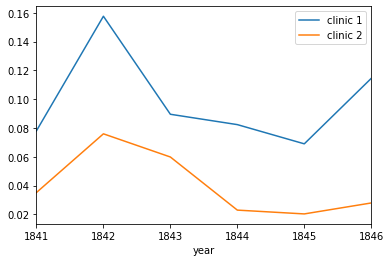

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
ax=yearly1.plot(x="year",y="proportion_deaths",label="clinic 1")
yearly2.plot(x="year",y="proportion_deaths",label="clinic 2",ax=ax)

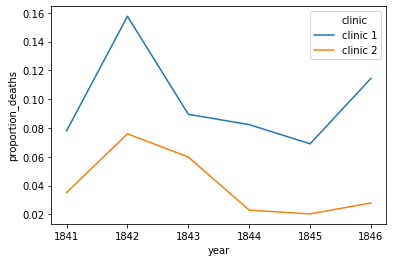

In [5]:
import seaborn as sns
sns.lineplot(y="proportion_deaths",x="year",data=yearly,hue="clinic")

# TASK 4

In [6]:
monthly=pd.read_csv("monthly_deaths.csv",parse_dates=["date"])
monthly["proportion_deaths"]=monthly["deaths"]/monthly["births"]
monthly.head()

,date,births,deaths,proportion_deaths
0,1841-01-01,254,37,0.145669
1,1841-02-01,239,18,0.075314
2,1841-03-01,277,12,0.043321
3,1841-04-01,255,4,0.015686
4,1841-05-01,255,2,0.007843


# TASK 5

<Figure size 720x720 with 0 Axes>

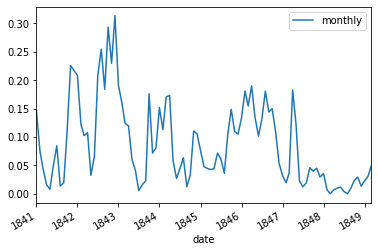

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(10,10))
monthly.plot(x="date",y="proportion_deaths",label="monthly")

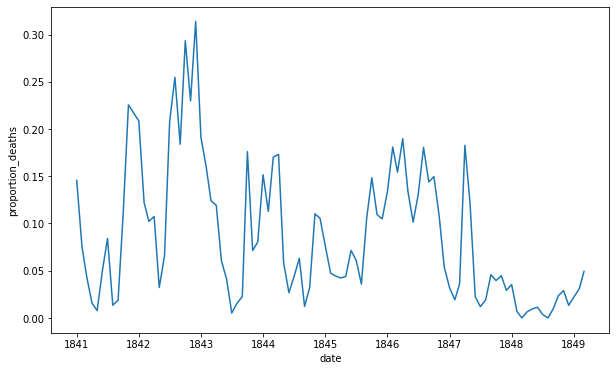

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(10,6))
import seaborn as sns
sns.lineplot(y="proportion_deaths",x="date",data=monthly)

# TASK 6

<Figure size 720x720 with 0 Axes>

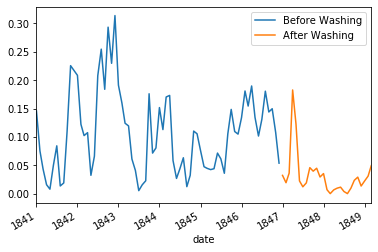

In [9]:
before_washing=monthly[monthly["date"]<"1847-01-01"]
after_washing=monthly[monthly["date"]>="1847-01-01"]
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(10,10))
ax=before_washing.plot(x="date",y="proportion_deaths",label="Before Washing")
after_washing.plot(x="date",y="proportion_deaths",label="After Washing",ax=ax)

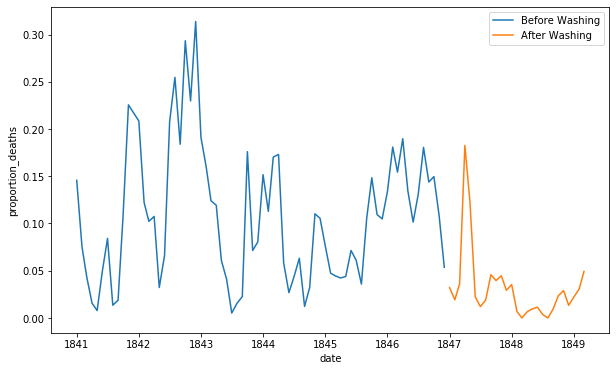

In [10]:
before_washing=monthly[monthly["date"]<"1847-01-01"]
after_washing=monthly[monthly["date"]>="1847-01-01"]
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
sns.lineplot(y="proportion_deaths",x="date",data=before_washing)
sns.lineplot(y="proportion_deaths",x="date",data=after_washing)
plt.legend(labels=["Before Washing","After Washing"])

# TASK 7

In [25]:
before_proportion=before_washing["proportion_deaths"]
after_proportion=after_washing["proportion_deaths"]
mean_diff=after_proportion.mean()-before_proportion.mean()
mean_diff

-0.07519076642777145

# TASK 8

In [24]:
boot_mean_diff = []
for i in range(3000):
    boot_before = before_proportion.sample(frac=1,replace=True)
    boot_after = after_proportion.sample(frac=1,replace=True)
    boot_mean_diff.append(boot_after.mean()-boot_before.mean())
confidence_interval=pd.Series(boot_mean_diff).quantile([0.025, 0.975])
confidence_interval

0.025   -0.096200
0.975   -0.053316
dtype: float64

# TASK 9